# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

# Imports

In [12]:
%load_ext autoreload
%autoreload 2

import pandas as pd

pd.set_option("display.max_columns", 500)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

### Loading the dataset

In [13]:
df = pd.read_csv("../data/abalone.csv")

#### Quick overview of the data

In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
df["age"] = df["Rings"] + 1.5

# remove rings variable
df.drop("Rings", axis=1, inplace=True)

Variable discription

`Sex`: M (male), F (female), I (infant)

`Length`: longest shell measurement (in mm)

`Diameter`: measurement perpendicular to legnth (in mm)

`Height`: with meat in shell (in mm)

`Whole weight`: the whole abalone (in grams)

`Shucked weight`: weight of the meat (in grams)

`Viscera weight`: gut weight after bleeding (in grams)

`Shell weight`: after being dried (in grams)

`Rings`: + 1.5 gives the age in years (the value to predict)

In [16]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [17]:
# number of unique values in each column
df.nunique().to_frame

<bound method Series.to_frame of Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
age                 28
dtype: int64>

# EDA

In [18]:
# separation of the variables

numerical_features = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
]

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = "age"

### Distribution of numerical features

In [19]:
numerical_features = df.select_dtypes(include=[np.number]).columns

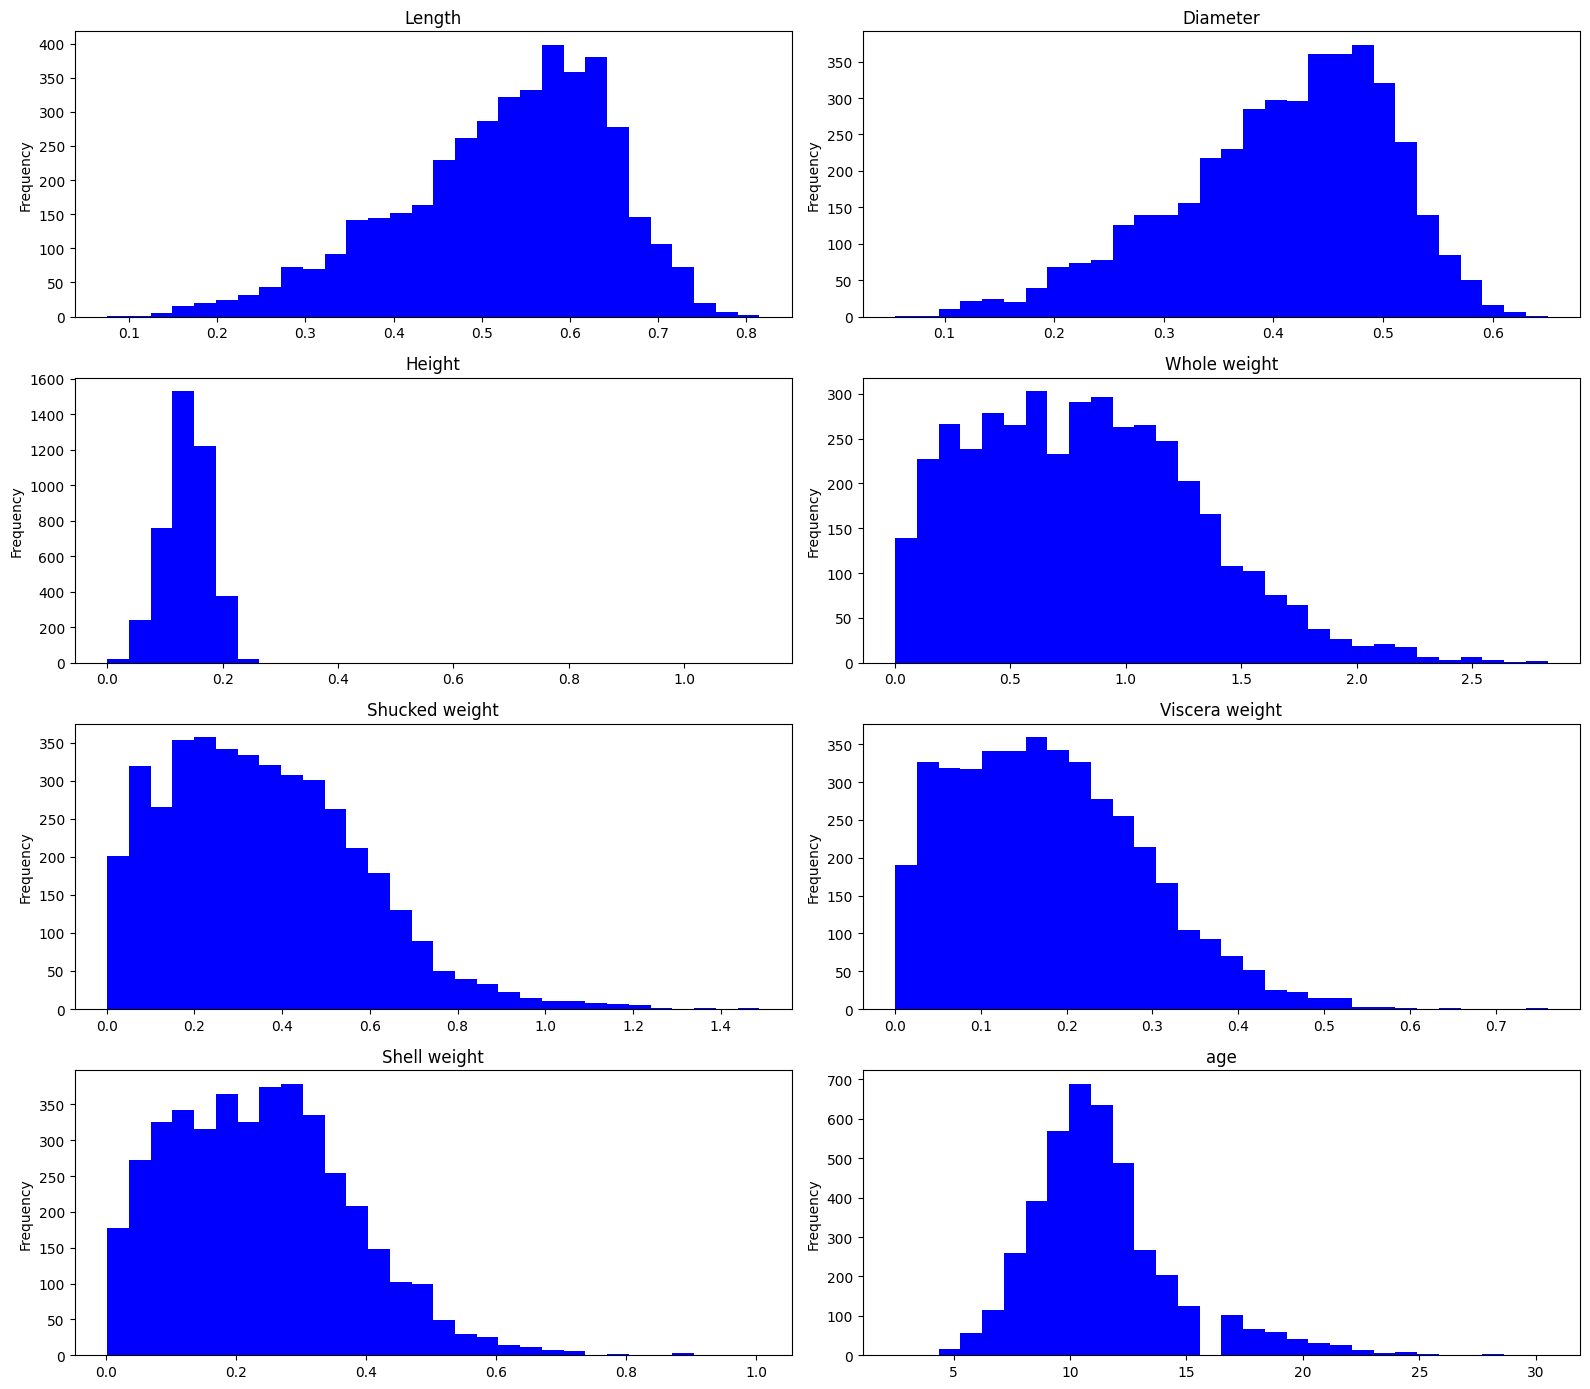

In [20]:
fig, axes = plt.subplots(4, 2, figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = df[c].plot(kind="hist", ax=axes[i], title=c, color="blue", bins=30)

plt.tight_layout()
plt.show()

### Observation of the outliers 

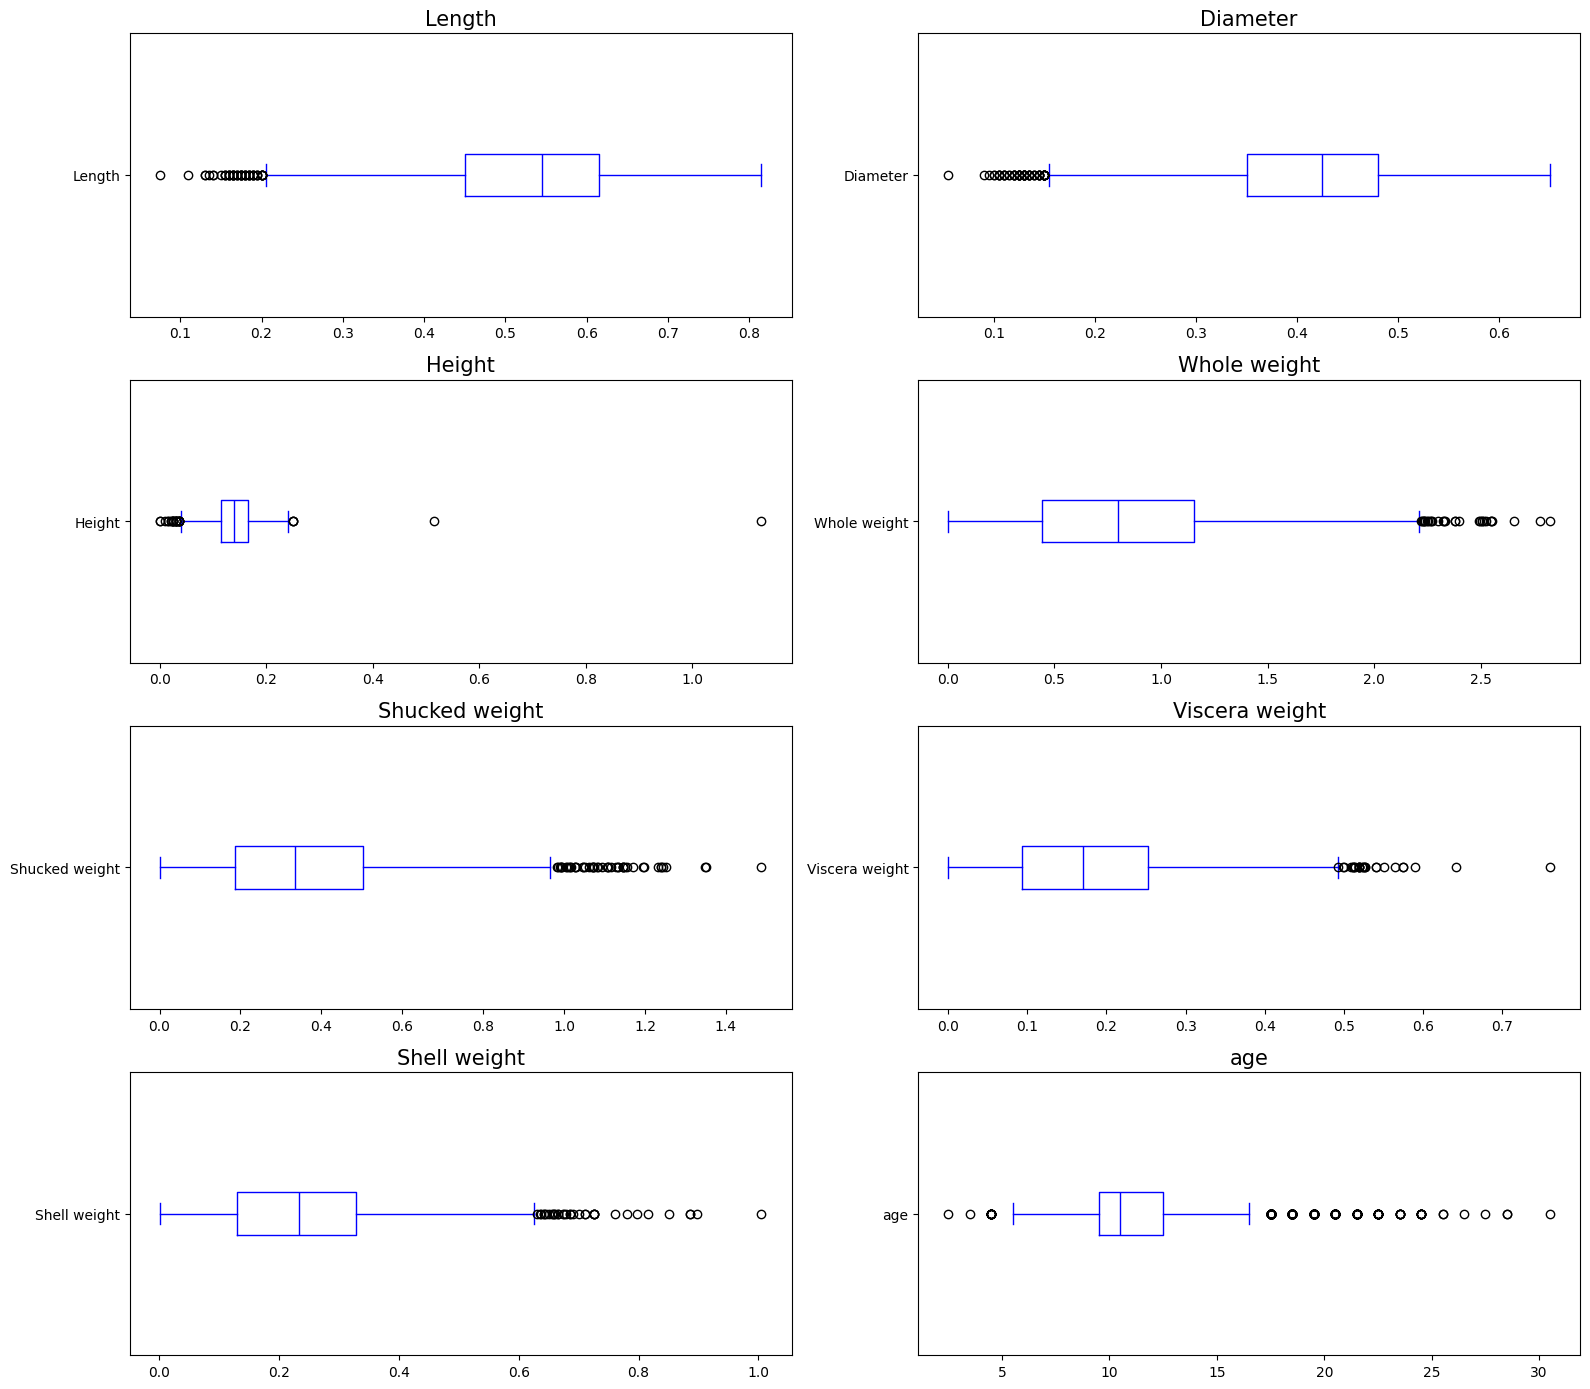

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = df[c].plot(kind="box", ax=axes[i], color="blue", vert=False)
    axes[i].set_title(c, fontsize=15)

plt.tight_layout()
plt.show()

### Relations of the variables with the target

c:\Users\jbrfa\Desktop\XHEC\HEC\MLOps\projet\xhec-mlops-project-student\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jbrfa\Desktop\XHEC\HEC\MLOps\projet\xhec-mlops-project-student\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jbrfa\Desktop\XHEC\HEC\MLOps\projet\xhec-mlops-project-student\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jbrfa\Desktop\XHEC\HEC\MLOps\projet\xhec-mlops-project-student\venv

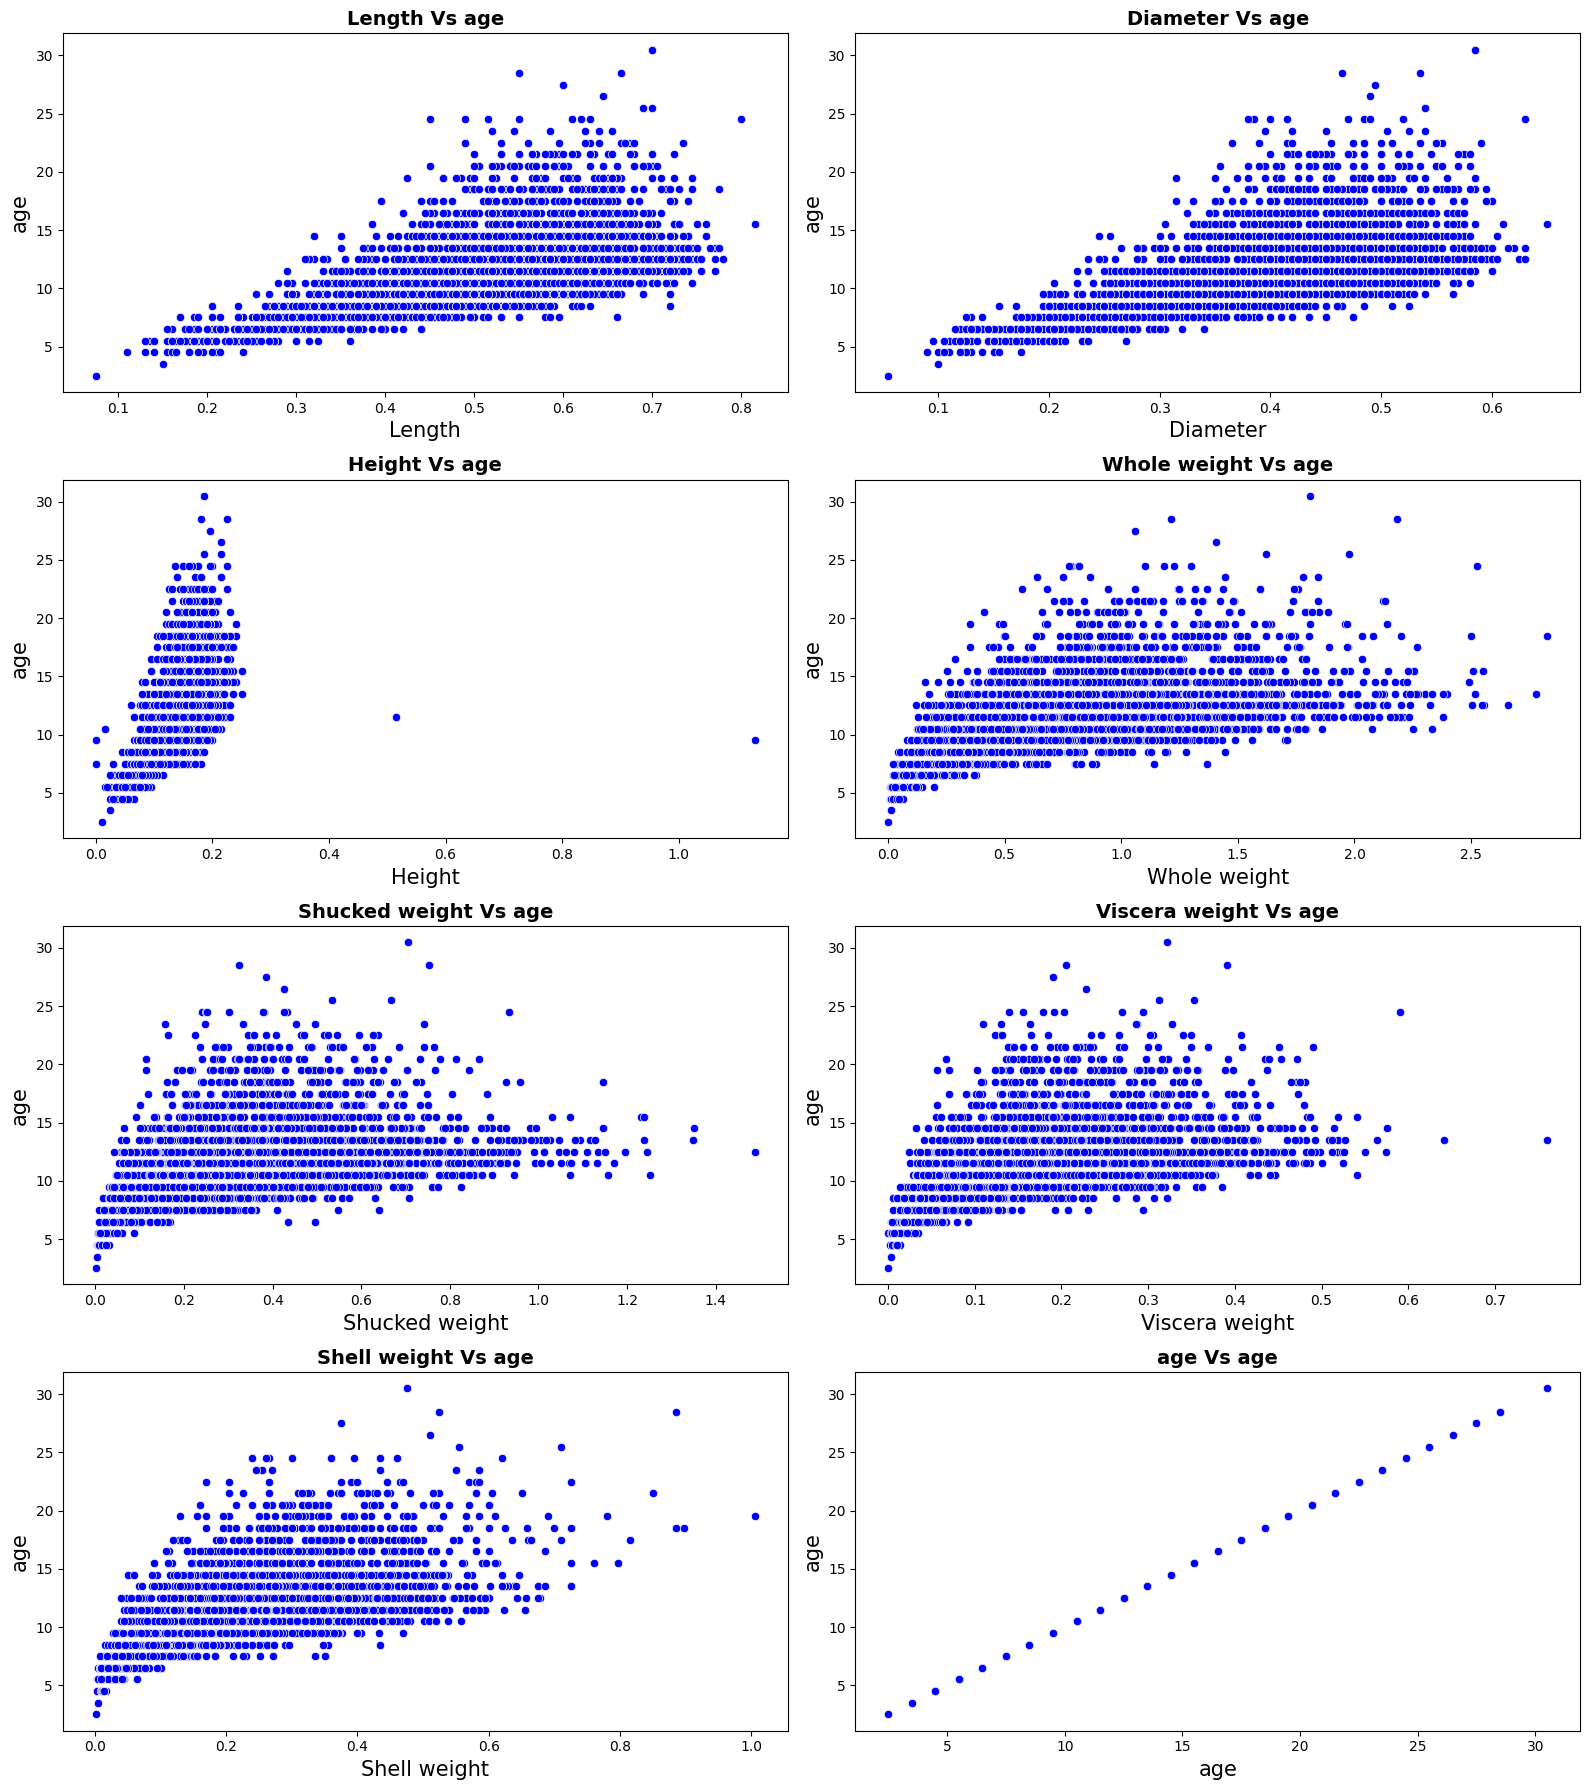

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    _ = sns.scatterplot(x=df[c], y=df[target], ax=axes[i], color="blue")

    axes[i].set_title(f"{c} Vs age", fontsize=14, fontweight="bold")

    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel("age", fontsize=15)

plt.tight_layout()
plt.show()

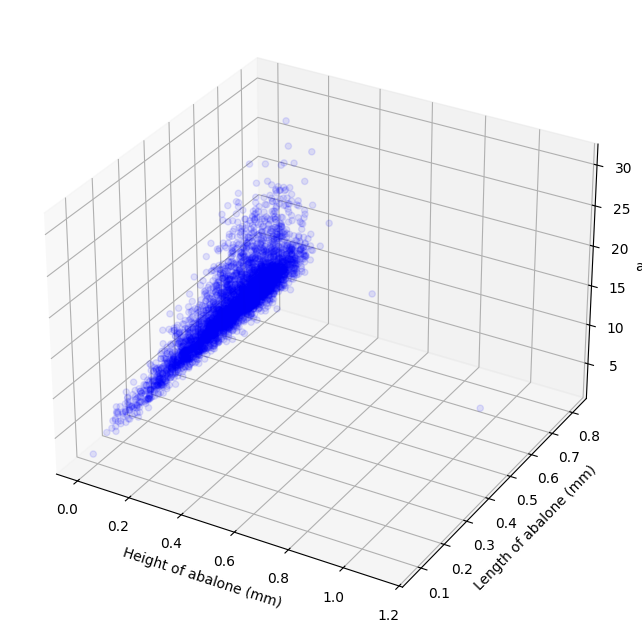

In [23]:
# height vs length vs age

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

ax.set_xlabel("Height of abalone (mm)")
ax.set_ylabel("Length of abalone (mm)")
ax.set_zlabel("age")
ax.scatter3D(df["Height"], df["Length"], df[target], c="blue", alpha=0.1)

plt.show()